___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Dealing with Missing Data

We already reviewed Pandas operations for missing data, now let's apply this to clean a real data file. Keep in mind, there is no 100% correct way of doing this, and this notebook just serves as an example of some reasonable approaches to take on this data.

#### Note: Throughout this section we will be slowly cleaning and adding features to the Ames Housing Dataset for use in the next section. Make sure to always be loading the same file name as in the notebook.

#### 2nd Note: Some of the methods shown here may not lead to optimal performance, but instead are shown to display examples of various methods available.
-----

## Imports

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [111]:
def Std_Vis_Plot():
    fig, ax = plt.subplots(figsize=(16, 9),dpi=650)
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid(which='minor', color='black',alpha=0.15, linestyle='--')
    ax.grid(which='major', color='black',alpha=0.33, linestyle='--')

In [112]:
with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data


In [113]:
df = pd.read_csv("../DATA/Ames_outliers_removed.csv")

In [114]:
df.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  526301100           20        RL         141.0     31770   Pave   NaN   
1  526350040           20        RH          80.0     11622   Pave   NaN   
2  526351010           20        RL          81.0     14267   Pave   NaN   
3  526353030           20        RL          93.0     11160   Pave   NaN   
4  527105010           60        RL          74.0     13830   Pave   NaN   

  Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence Misc Feature  \
0       IR1          Lvl    AllPub  ...         0     NaN    NaN          NaN   
1       Reg          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   
2       IR1          Lvl    AllPub  ...         0     NaN    NaN         Gar2   
3       Reg          Lvl    AllPub  ...         0     NaN    NaN          NaN   
4       IR1          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
0        0       5    2010        WD           Normal     215000  
1        0       6    2010        WD           Normal     105000  
2    12500       6    2010        WD           Normal     172000  
3        0       4    2010        WD           Normal     244000  
4        0       3    2010        WD           Normal     189900  

[5 rows x 81 columns]

In [115]:
df['Sale Condition'].unique()

array(['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'],
      dtype=object)

In [116]:
len(df.columns)

81

In [117]:
df.describe().transpose()

count          mean           std          min          25%  \
PID              2927.0  7.142660e+08  1.887256e+08  526301100.0  528477015.0   
MS SubClass      2927.0  5.739836e+01  4.265422e+01         20.0         20.0   
Lot Frontage     2437.0  6.907550e+01  2.278727e+01         21.0         58.0   
Lot Area         2927.0  1.010937e+04  7.782876e+03       1300.0       7439.0   
Overall Qual     2927.0  6.090878e+00  1.406195e+00          1.0          5.0   
Overall Cond     2927.0  5.563717e+00  1.111960e+00          1.0          5.0   
Year Built       2927.0  1.971319e+03  3.023849e+01       1872.0       1954.0   
Year Remod/Add   2927.0  1.984242e+03  2.085673e+01       1950.0       1965.0   
Mas Vnr Area     2904.0  1.010441e+02  1.770987e+02          0.0          0.0   
BsmtFin SF 1     2926.0  4.390116e+02  4.393558e+02          0.0          0.0   
BsmtFin SF 2     2926.0  4.977341e+01  1.692477e+02          0.0          0.0   
Bsmt Unf SF      2926.0  5.590058e+02  4.395691e+02          0.0        219.0   
Total Bsmt SF    2926.0  1.047791e+03  4.224935e+02          0.0        793.0   
1st Flr SF       2927.0  1.156330e+03  3.779286e+02        334.0        876.0   
2nd Flr SF       2927.0  3.349498e+02  4.278423e+02          0.0          0.0   
Low Qual Fin SF  2927.0  4.681585e+00  4.633400e+01          0.0          0.0   
Gr Liv Area      2927.0  1.495962e+03  4.919932e+02        334.0       1126.0   
Bsmt Full Bath   2925.0  4.304274e-01  5.240756e-01          0.0          0.0   
Bsmt Half Bath   2925.0  6.085470e-02  2.447589e-01          0.0          0.0   
Full Bath        2927.0  1.565767e+00  5.524722e-01          0.0          1.0   
Half Bath        2927.0  3.788862e-01  5.024938e-01          0.0          0.0   
Bedroom AbvGr    2927.0  2.854458e+00  8.279960e-01          0.0          2.0   
Kitchen AbvGr    2927.0  1.044414e+00  2.141812e-01          0.0          1.0   
TotRms AbvGrd    2927.0  6.436625e+00  1.560140e+00          2.0          5.0   
Fireplaces       2927.0  5.978818e-01  6.461693e-01          0.0          0.0   
Garage Yr Blt    2768.0  1.978100e+03  2.552370e+01       1895.0       1960.0   
Garage Cars      2926.0  1.765892e+00  7.602600e-01          0.0          1.0   
Garage Area      2926.0  4.721234e+02  2.139395e+02          0.0        320.0   
Wood Deck SF     2927.0  9.351725e+01  1.261121e+02          0.0          0.0   
Open Porch SF    2927.0  4.717834e+01  6.655152e+01          0.0          0.0   
Enclosed Porch   2927.0  2.303519e+01  6.416770e+01          0.0          0.0   
3Ssn Porch       2927.0  2.595149e+00  2.515408e+01          0.0          0.0   
Screen Porch     2927.0  1.601845e+01  5.611377e+01          0.0          0.0   
Pool Area        2927.0  2.081654e+00  3.450248e+01          0.0          0.0   
Misc Val         2927.0  4.487906e+01  4.720780e+02          0.0          0.0   
Mo Sold          2927.0  6.215237e+00  2.712368e+00          1.0          4.0   
Yr Sold          2927.0  2.007791e+03  1.317120e+00       2006.0       2007.0   
SalePrice        2927.0  1.808008e+05  7.992666e+04      12789.0     129500.0   

                         50%          75%           max  
PID              535453200.0  907180125.0  1.007100e+09  
MS SubClass             50.0         70.0  1.900000e+02  
Lot Frontage            68.0         80.0  3.130000e+02  
Lot Area              9430.0      11523.0  2.152450e+05  
Overall Qual             6.0          7.0  1.000000e+01  
Overall Cond             5.0          6.0  9.000000e+00  
Year Built            1973.0       2000.5  2.010000e+03  
Year Remod/Add        1993.0       2004.0  2.010000e+03  
Mas Vnr Area             0.0        164.0  1.600000e+03  
BsmtFin SF 1           370.0        734.0  2.288000e+03  
BsmtFin SF 2             0.0          0.0  1.526000e+03  
Bsmt Unf SF            464.5        801.0  2.336000e+03  
Total Bsmt SF          990.0       1300.0  3.206000e+03  
1st Flr SF            1083.0       1383.0  3.8

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

### Removing the PID

We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.

In [119]:
df = df.drop('PID',axis=1)

In [120]:
len(df.columns)

80

In [121]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [122]:
str_na_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2','Pool QC', 'Alley', 'Fireplace Qu', 'Garage Type', 'Garage Finish','Garage Qual','Garage Cond','Fence', 'Misc Feature', 'Mas Vnr Type' ]
df[str_na_cols] = df[str_na_cols].fillna('NA')

In [158]:
int_na_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Area','Garage Yr Blt','Garage Cars','Garage Area']
df[int_na_cols] = df[int_na_cols].fillna(0)

In [124]:
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL         141.0     31770   Pave    NA       IR1   
1           20        RH          80.0     11622   Pave    NA       Reg   
2           20        RL          81.0     14267   Pave    NA       IR1   
3           20        RL          93.0     11160   Pave    NA       Reg   
4           60        RL          74.0     13830   Pave    NA       IR1   

  Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
0          Lvl    AllPub     Corner  ...         0      NA     NA   
1          Lvl    AllPub     Inside  ...         0      NA  MnPrv   
2          Lvl    AllPub     Corner  ...         0      NA     NA   
3          Lvl    AllPub     Corner  ...         0      NA     NA   
4          Lvl    AllPub     Inside  ...         0      NA  MnPrv   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  SalePrice  
0           NA        0       5     2010        WD           Normal     215000  
1           NA        0       6     2010        WD           Normal     105000  
2         Gar2    12500       6     2010        WD           Normal     172000  
3           NA        0       4     2010        WD           Normal     244000  
4           NA        0       3     2010        WD           Normal     189900  

[5 rows x 80 columns]

In [125]:
object_list_columns = list(df.select_dtypes(include='object'))
object_list_columns

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [126]:
# df2=pd.get_dummies(df,columns=object_list_columns,drop_first=True)

In [127]:
#df2.columns

## Observing NaN Features

In [129]:
dfnull = df[df.isnull().any(axis=1)]

In [130]:
dfnull

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
11             20        RL           NaN      7980   Pave    NA       IR1   
14            120        RL           NaN      6820   Pave    NA       IR1   
22             60        FV           NaN      7500   Pave    NA       Reg   
23             20        RL           NaN     11241   Pave    NA       IR1   
24             20        RL           NaN     12537   Pave    NA       IR1   
...           ...       ...           ...       ...    ...   ...       ...   
2913          180        RM          21.0      1533   Pave    NA       Reg   
2915          160        RM          21.0      1526   Pave    NA       Reg   
2916          160        RM          21.0      1936   Pave    NA       Reg   
2923           20        RL           NaN      8885   Pave    NA       IR1   
2924           85        RL          62.0     10441   Pave    NA       Reg   

     Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
11            Lvl    AllPub     Inside  ...         0      NA  GdPrv   
14            Lvl    AllPub     Corner  ...         0      NA     NA   
22            Lvl    AllPub     Inside  ...         0      NA     NA   
23            Lvl    AllPub    CulDSac  ...         0      NA     NA   
24            Lvl    AllPub    CulDSac  ...         0      NA     NA   
...           ...       ...        ...  ...       ...     ...    ...   
2913          Lvl    AllPub     Inside  ...         0      NA     NA   
2915          Lvl    AllPub     Inside  ...         0      NA  GdPrv   
2916          Lvl    AllPub     Inside  ...         0      NA     NA   
2923          Low    AllPub     Inside  ...         0      NA  MnPrv   
2924          Lvl    AllPub     Inside  ...         0      NA  MnPrv   

     Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
11           Shed      500       3     2010        WD           Normal   
14             NA        0       6     2010        WD           Normal   
22             NA        0       1     2010        WD           Normal   
23           Shed      700       3     2010        WD           Normal   
24             NA        0       4     2010        WD           Normal   
...           ...      ...     ...      ...        ...             ...   
2913           NA        0       8     2006        WD          Abnorml   
2915           NA        0       6     2006        WD           Normal   
2916           NA        0       6     2006        WD           Normal   
2923           NA        0       6     2006        WD           Normal   
2924         Shed      700       7     2006        WD           Normal   

      SalePrice  
11       185000  
14       212000  
22       216000  
23       149000  
24       149900  
...         ...  
2913      92000  
2915      79500  
2916      90500  
2923     131000  
2924     132000  

[639 rows x 80 columns]

In [131]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [132]:
100* df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [133]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [134]:
percent_nan = percent_missing(df)

In [149]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

Garage Yr Blt  Year Built Garage Type
0            1960.0        1960      Attchd
1            1961.0        1961      Attchd
2            1958.0        1958      Attchd
3            1968.0        1968      Attchd
4            1997.0        1997      Attchd
...             ...         ...         ...
2922         1984.0        1984      Detchd
2923         1983.0        1983      Attchd
2924            NaN        1992          NA
2925         1975.0        1974      Attchd
2926         1993.0        1993      Attchd

[2927 rows x 3 columns]

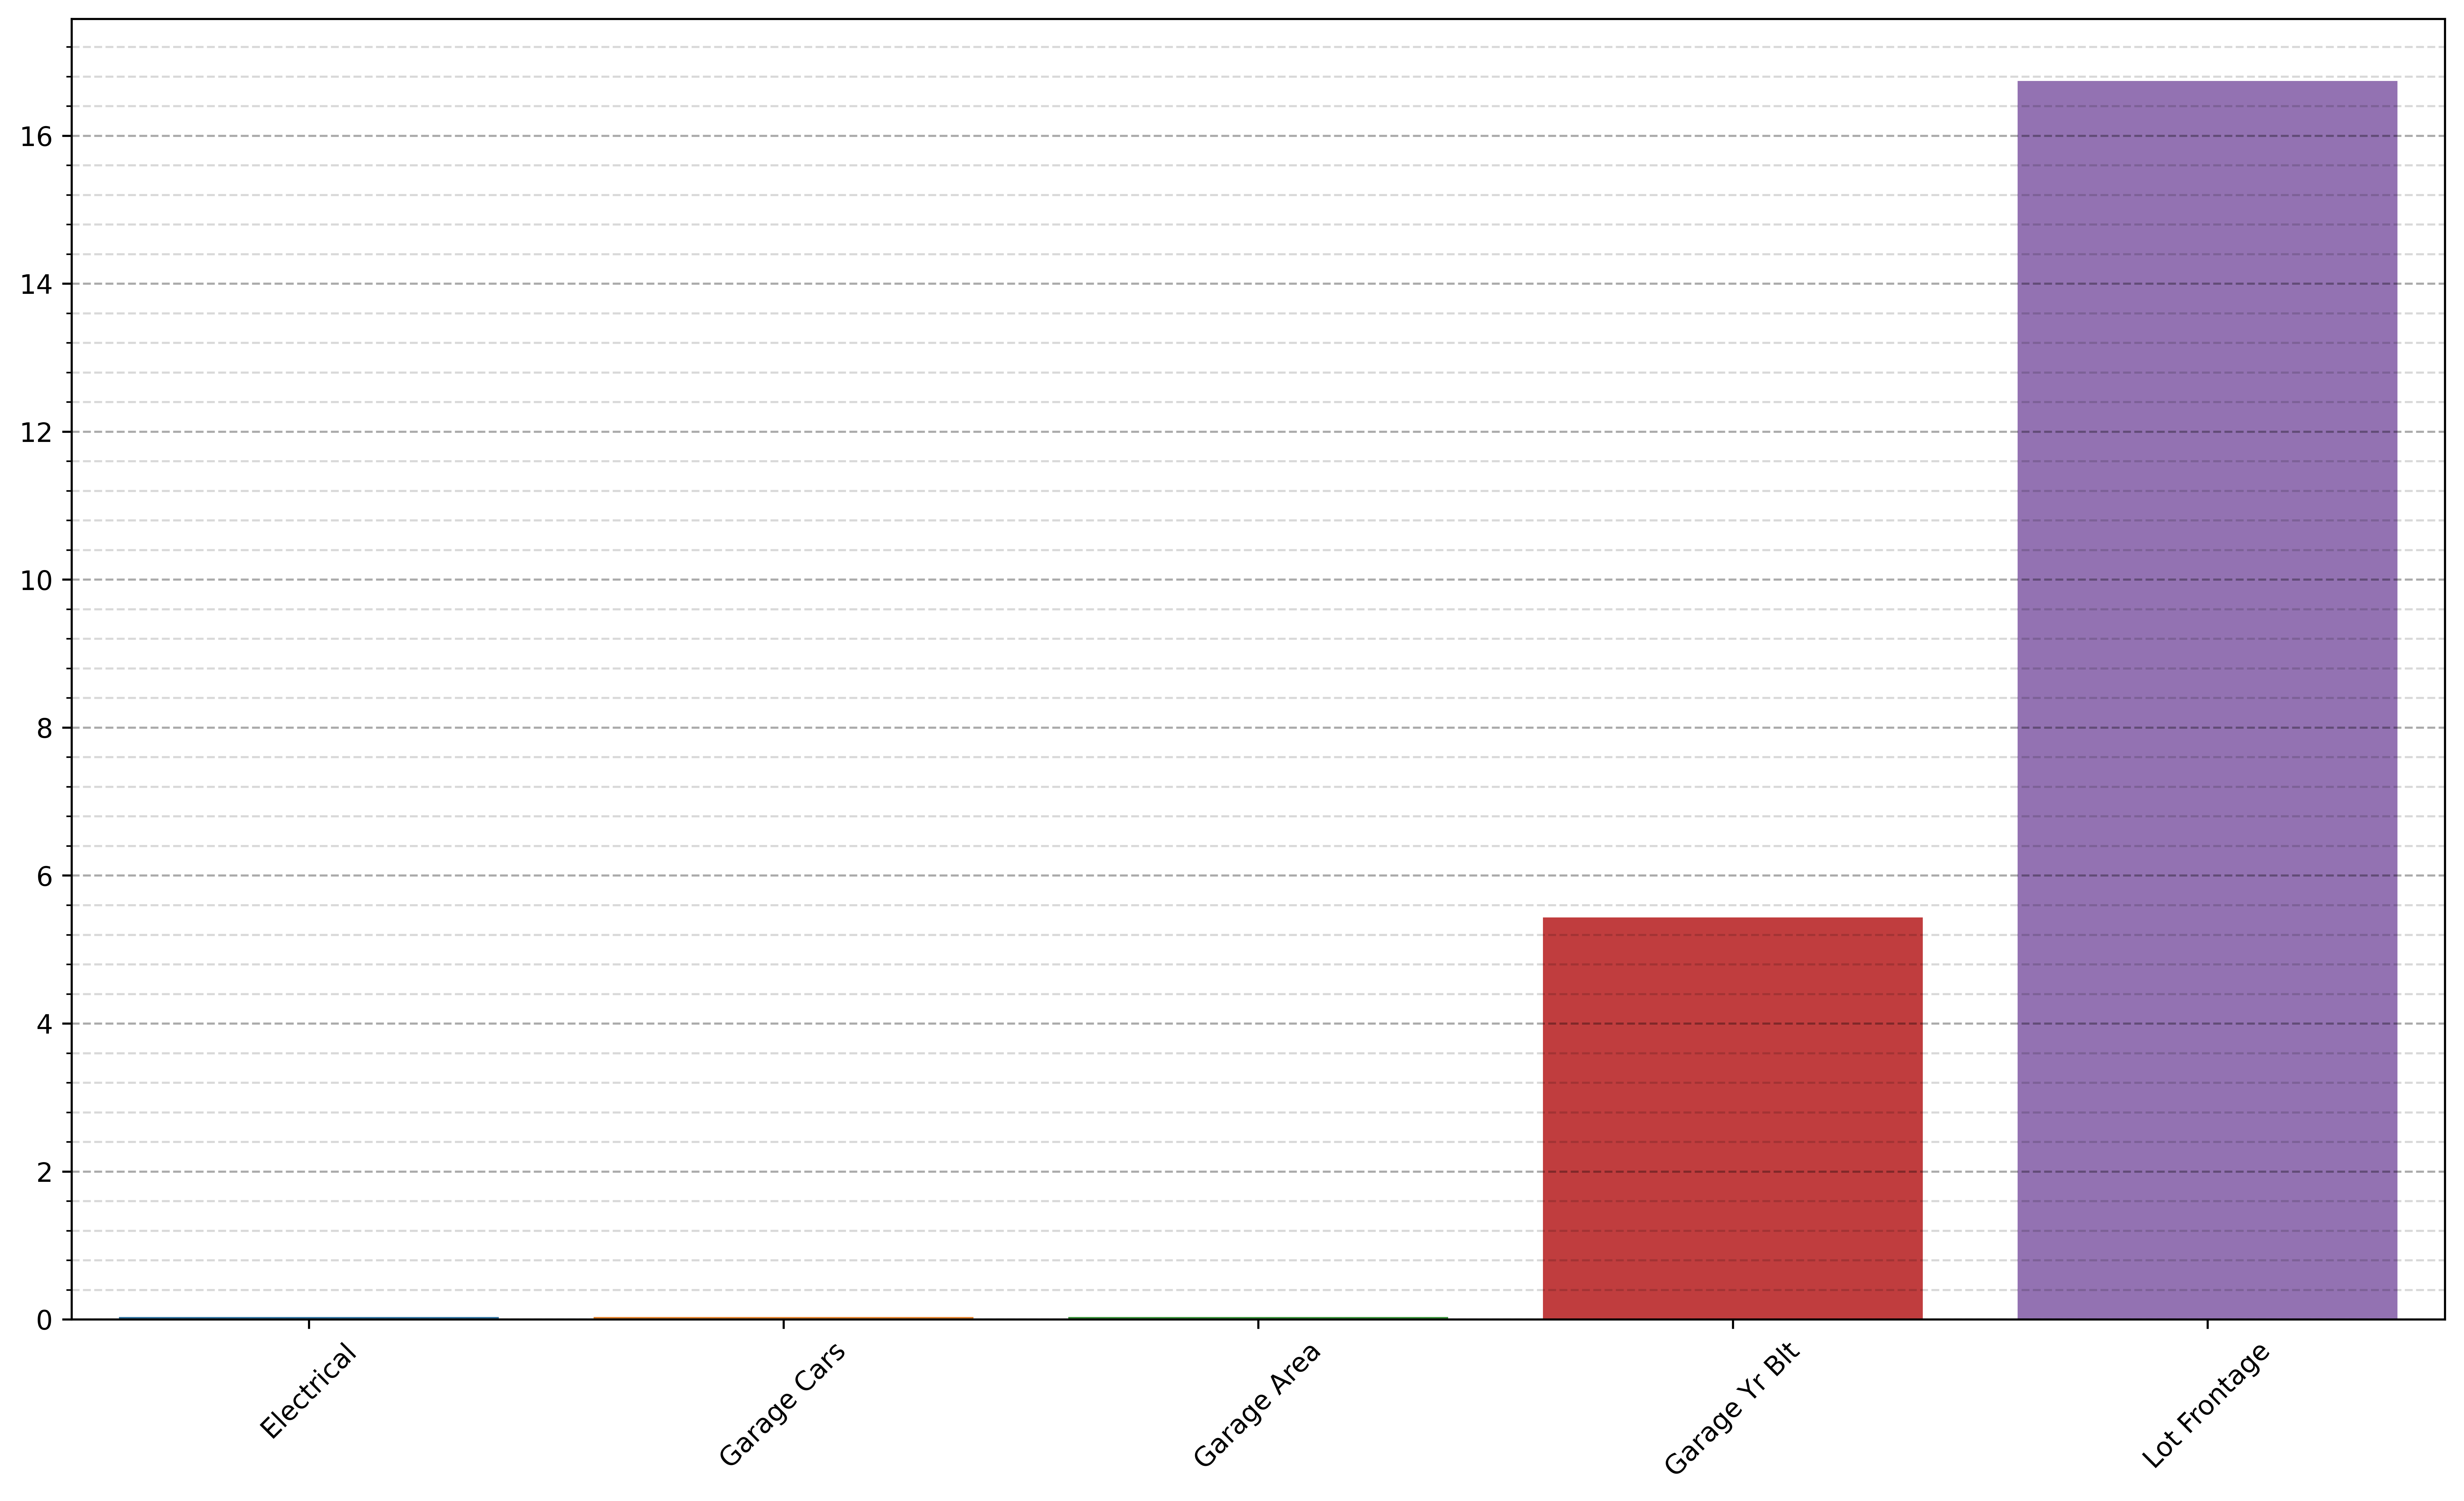

In [135]:
Std_Vis_Plot()
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=45);

# Removing Features or Removing Rows

If only a few rows relative to the size of your dataset are missing some values, then it might just be a good idea to drop those rows. What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.

Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category. 

Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set!

## Working based on Rows Missing Data

## Filling in Data or Dropping Data?

Let's explore how to choose to remove or fill in missing data for rows that are missing some data. Let's choose some threshold where we decide it is ok to drop a row if its missing some data (instead of attempting to fill in that missing data point). We will choose 1% as our threshold. This means if less than 1% of the rows are missing this feature, we will consider just dropping that row, instead of dealing with the feature itself. There is no right answer here, just use common sense and your domain knowledge of the dataset, obviously you don't want to drop a very high threshold like 50% , you should also explore correlation to the dataset, maybe it makes sense to drop the feature instead.

Based on the text description of the features, you will see that most of this missing data is actually NaN on purpose as a placeholder for 0 or "none".

## Example of Filling in Data : Basement Columns

(0.0, 1.0)

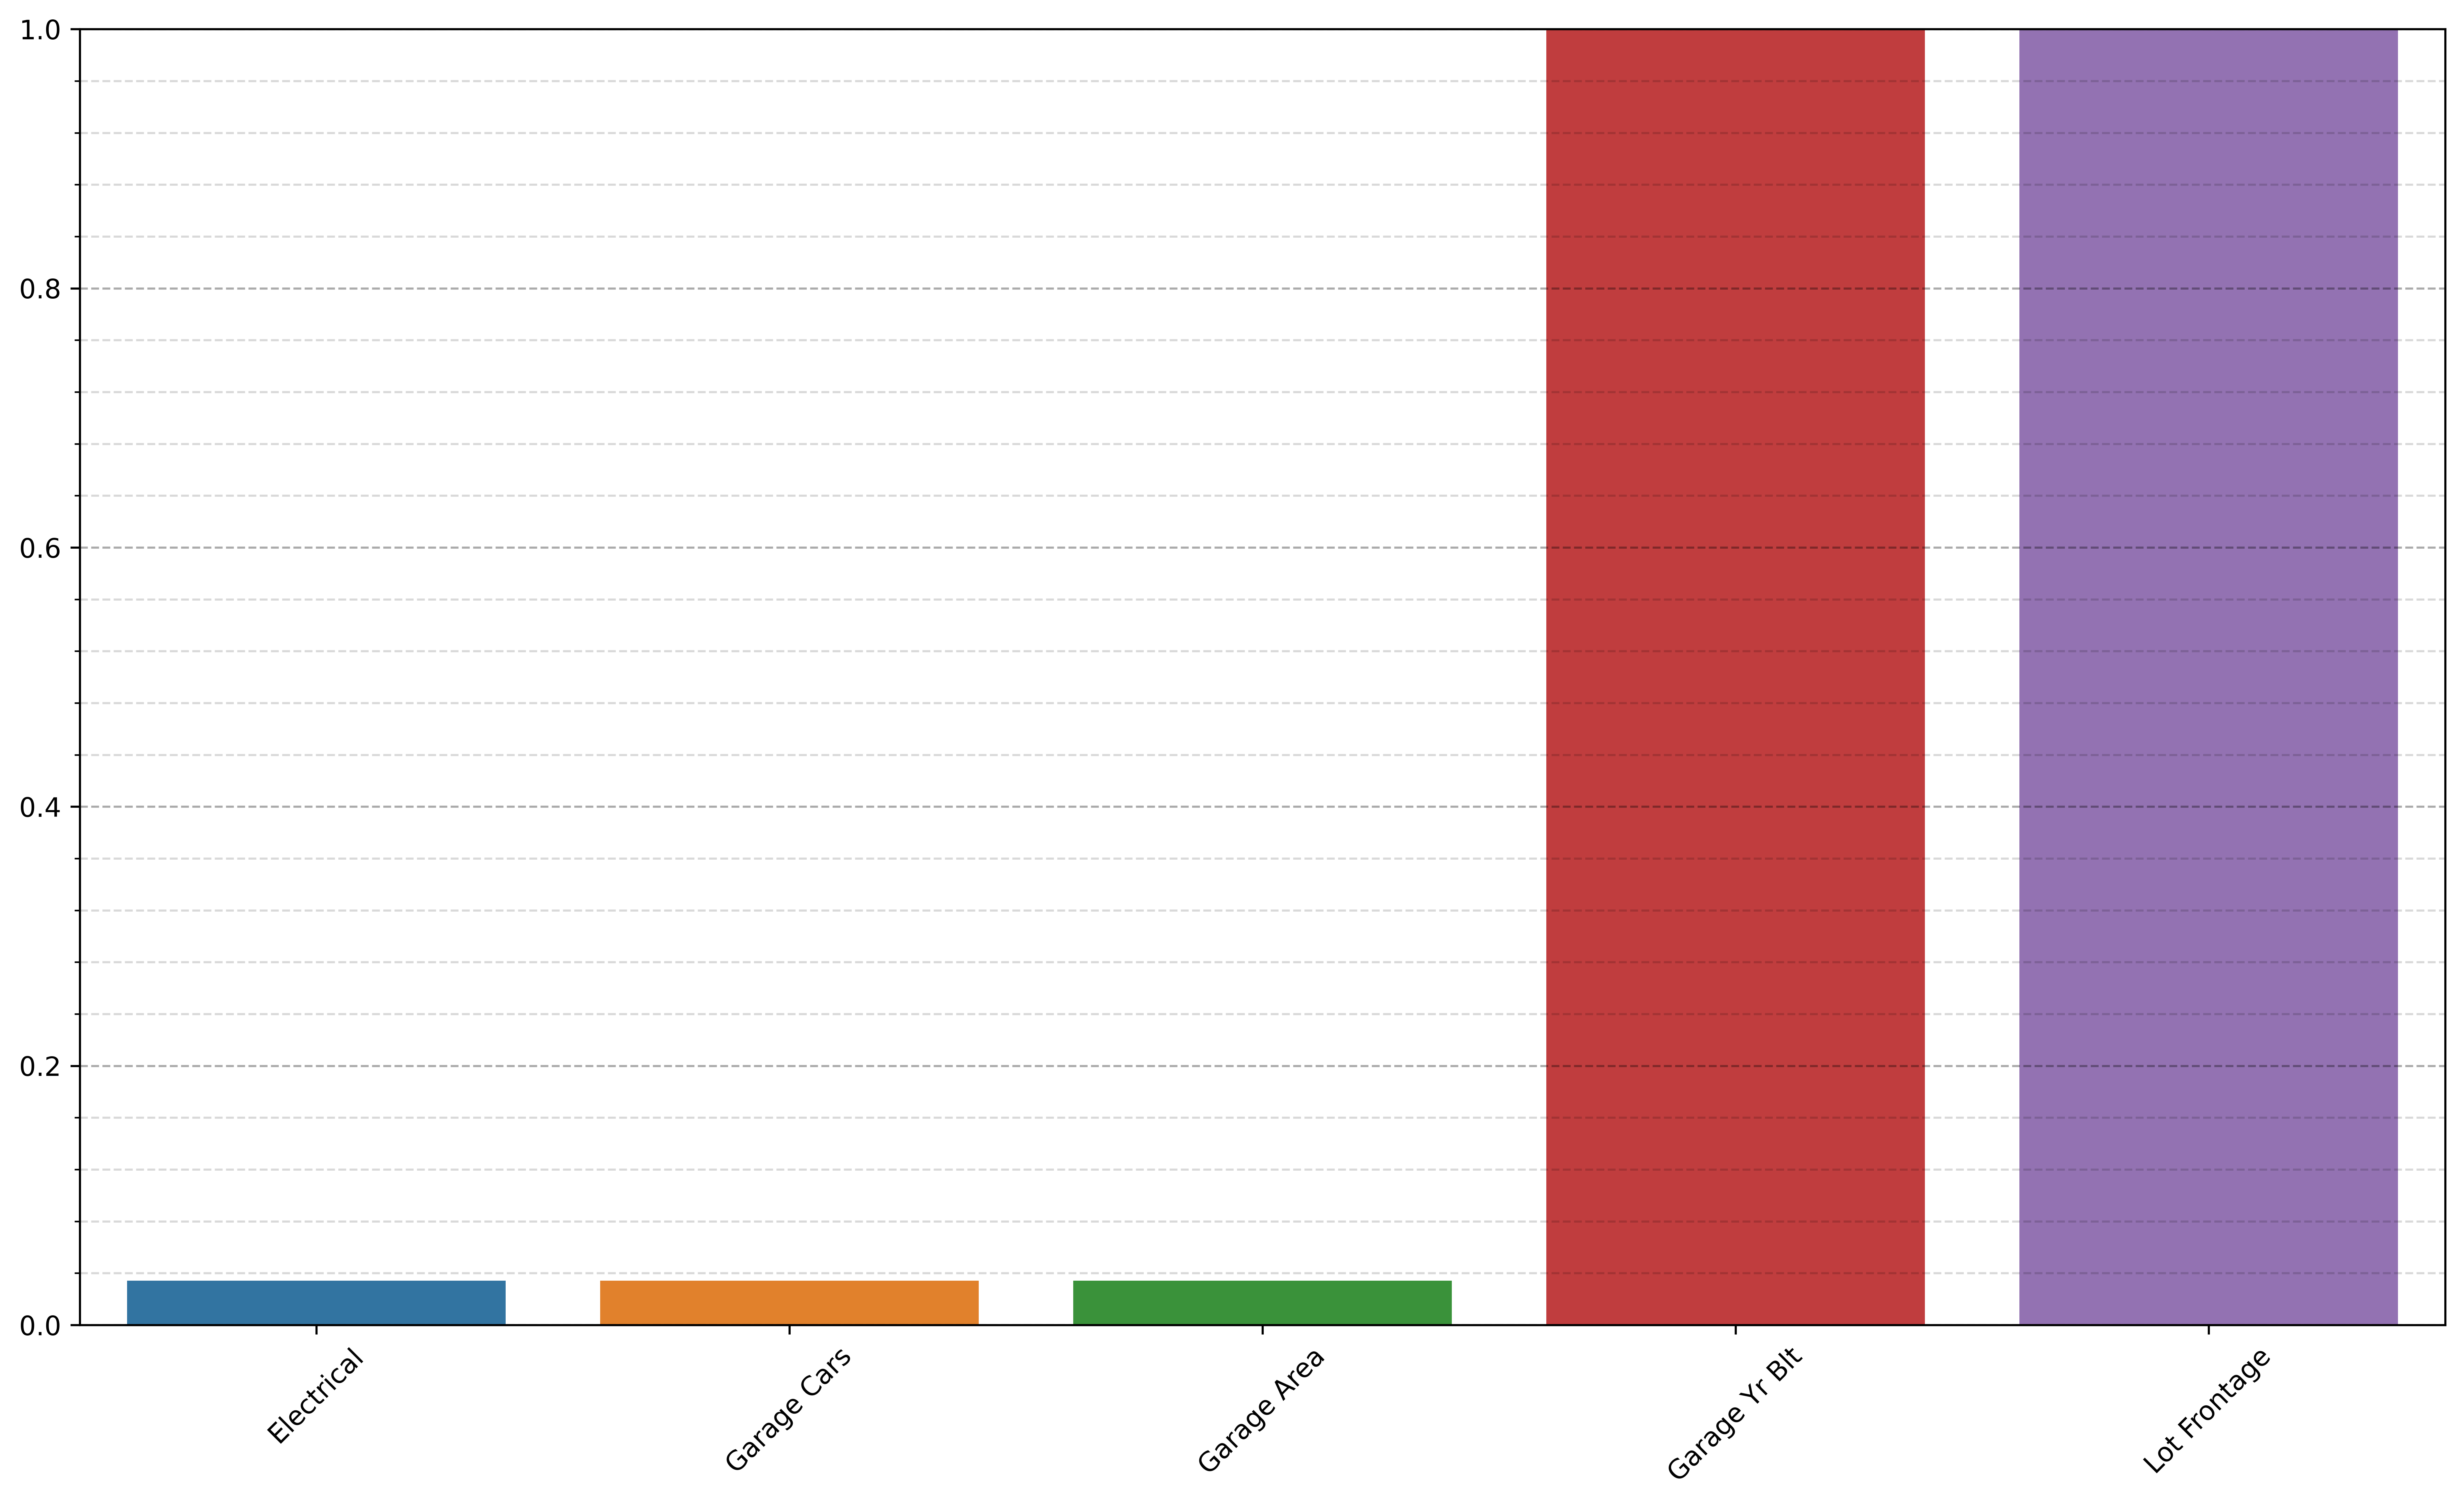

In [136]:
Std_Vis_Plot()
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=45);
# Set 1% Threshold
plt.ylim(0,1)

Let's drop or fill the rows based on this data. You could either manually fill in the data (especially the Basement data based on the description text file) OR you could simply drop the row and not consider it. Watch the video for a full explanation of this, in reality it probably makes more sense to fill in the Missing Basement data since its well described in the text description.

In [137]:
# Could also imply we should ex
percent_nan[percent_nan < 1]

Electrical     0.034165
Garage Cars    0.034165
Garage Area    0.034165
dtype: float64

In [138]:
100/len(df)

0.0341646737273659

**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

The numerical columns:

In [143]:
percent_nan = percent_missing(df)

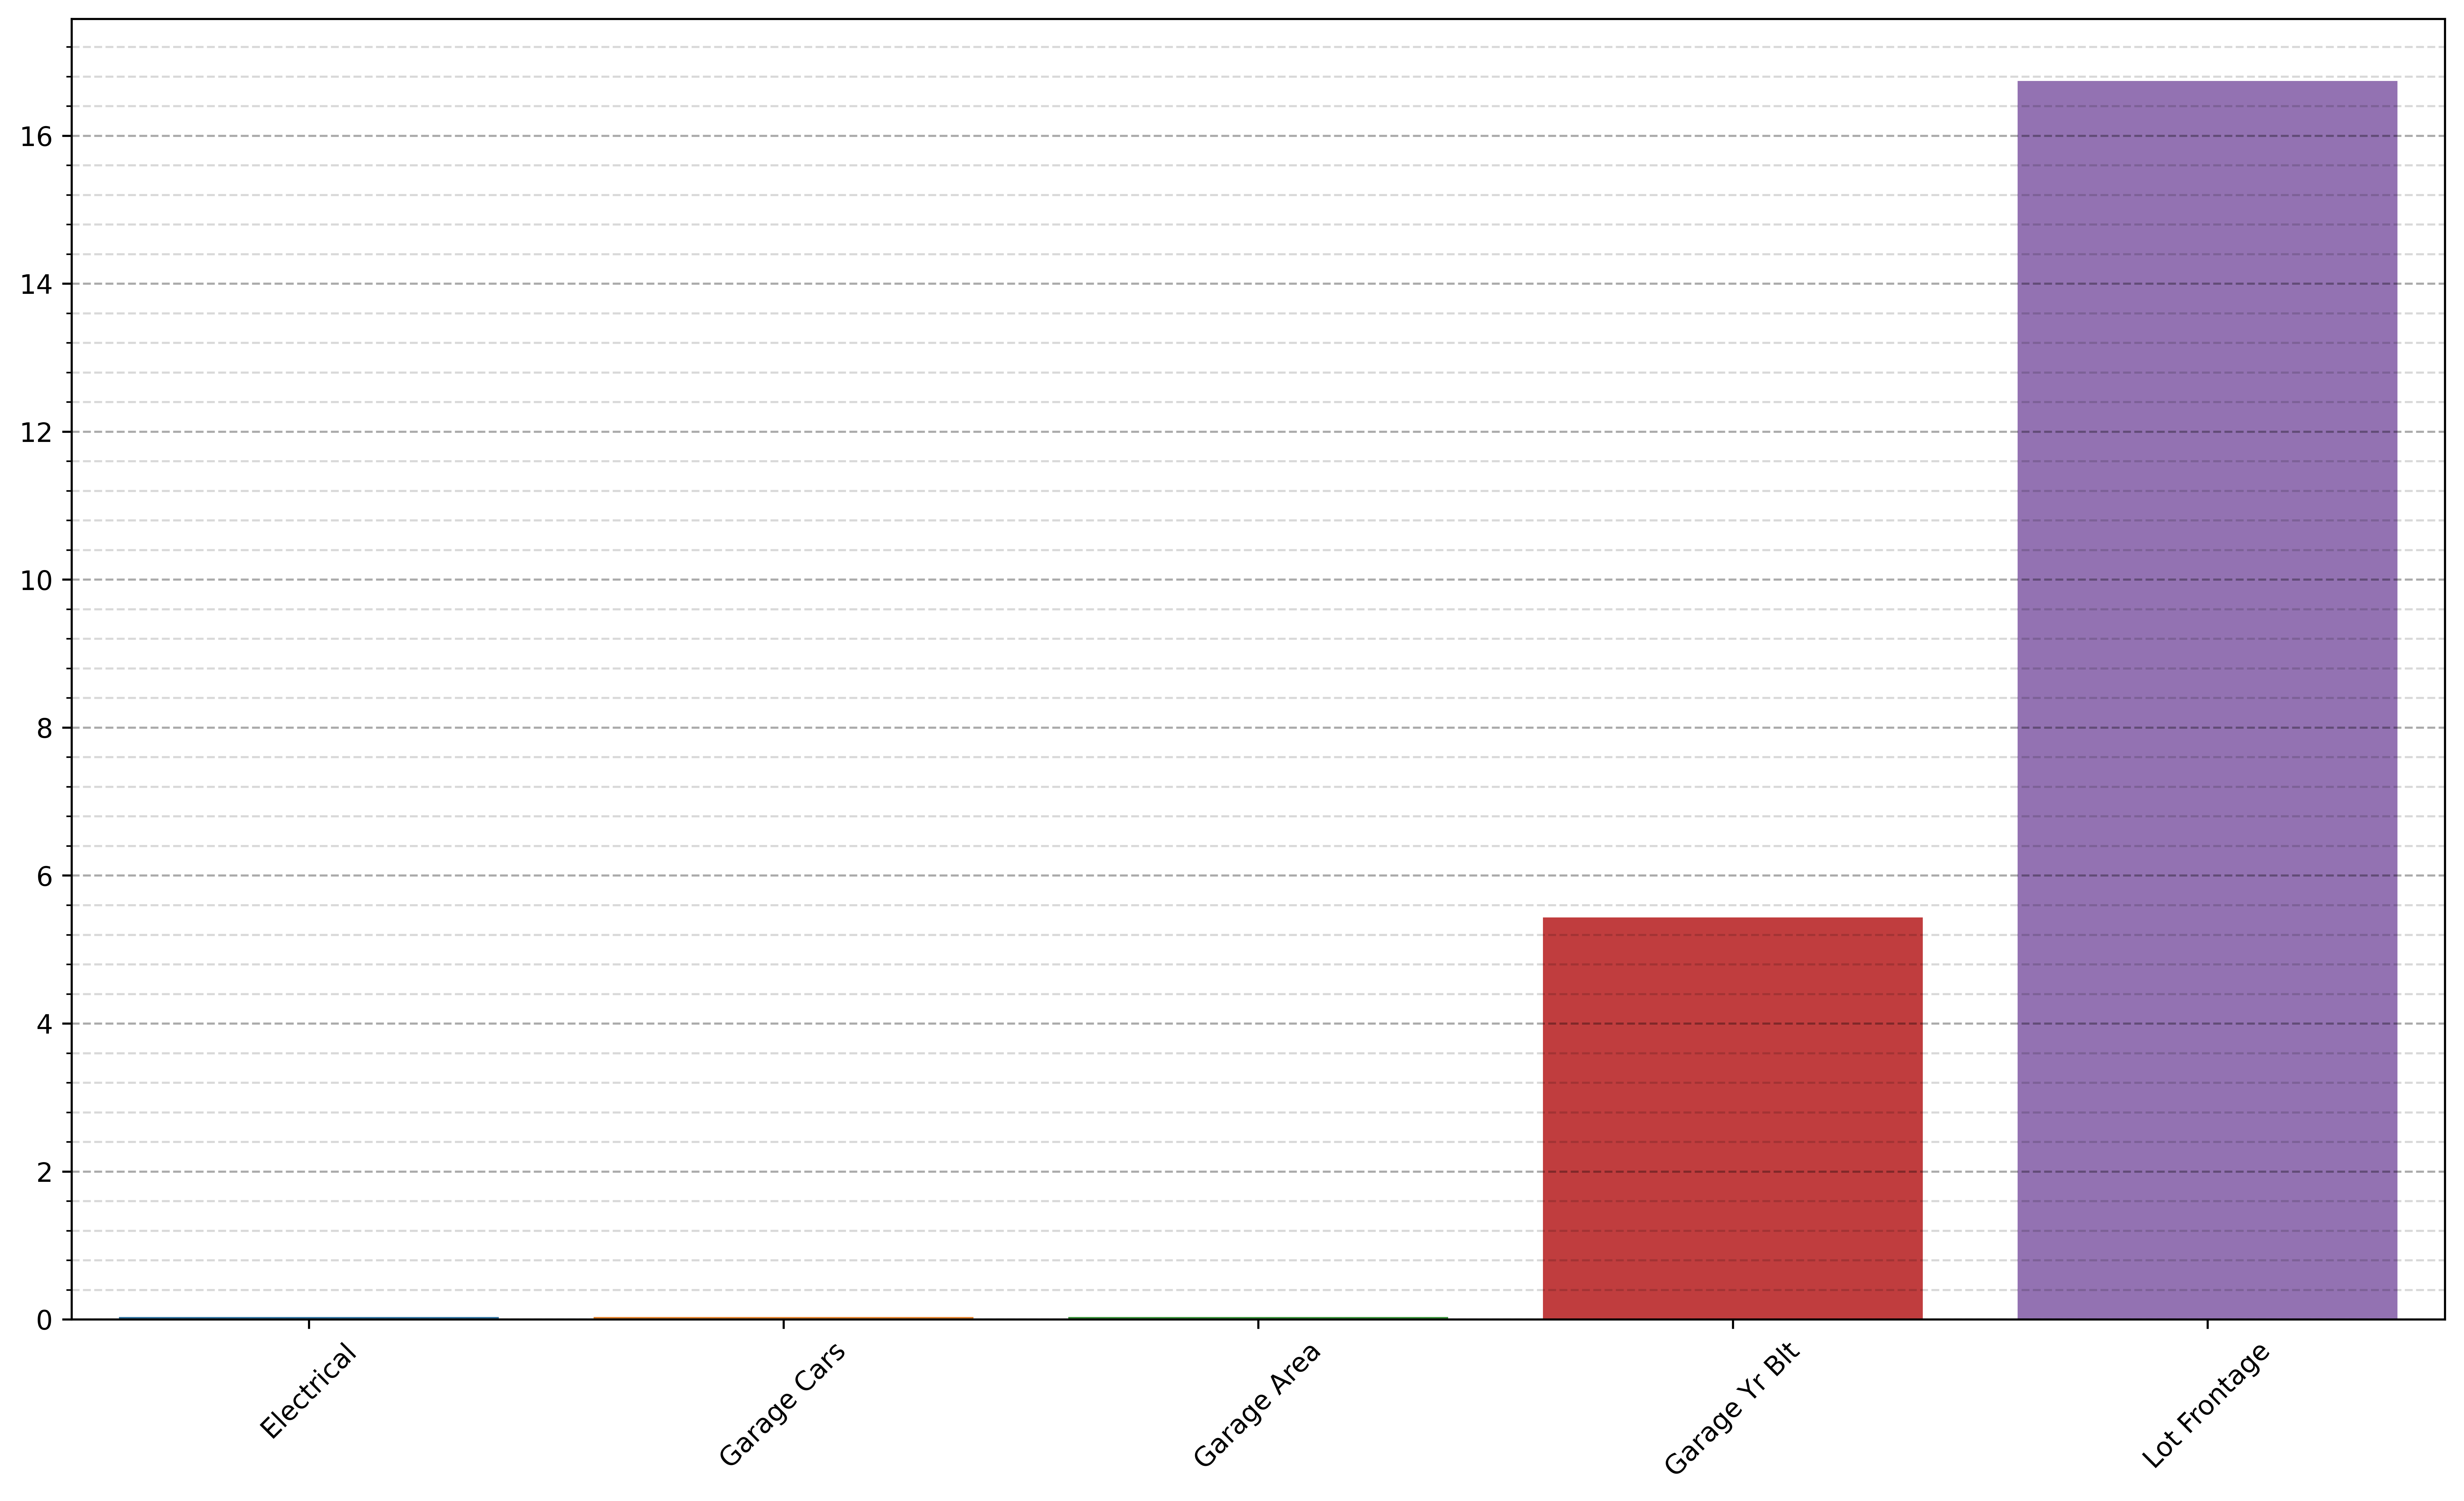

In [145]:
Std_Vis_Plot()
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=45);

## Dropping Rows

A few of these features appear that it is just one or two rows missing the data. Based on our description .txt file of the dataset, we could also fill in these data points easily, and that is the more correct approach, but here we show how to drop in case you find yourself in a situation where it makes more sense to drop a row, based on missing column features.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [ ]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
Std_Vis_Plot()
plt.figure(figsize=(16,9),dpi=500)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=45);
plt.ylim(0,1)

### Mas Vnr Feature 

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

In [ ]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
Std_Vis_Plot()
plt.figure(figsize=(16,9),dpi=500)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=45);


# Filling In Missing Column Data

Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

### Garage Columns

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [ ]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

In [ ]:
df.describe().transpose

In [ ]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [ ]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
plt.figure(figsize=(16,9),dpi=500)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=45);

## Dropping Feature Columns

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0. But for the sake of showing variations on dealing with missing data, we will remove these features, instead of filling them in with the appropriate value.

### Filling in Fireplace Quality based on Description Text

In [160]:
df['Fireplace Qu'].value_counts()

NA    1422
Gd     741
TA     600
Fa      75
Po      46
Ex      43
Name: Fireplace Qu, dtype: int64

In [ ]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=STD_rotation);

In [ ]:
df['Lot Frontage']

# [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) of Missing Data

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [161]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

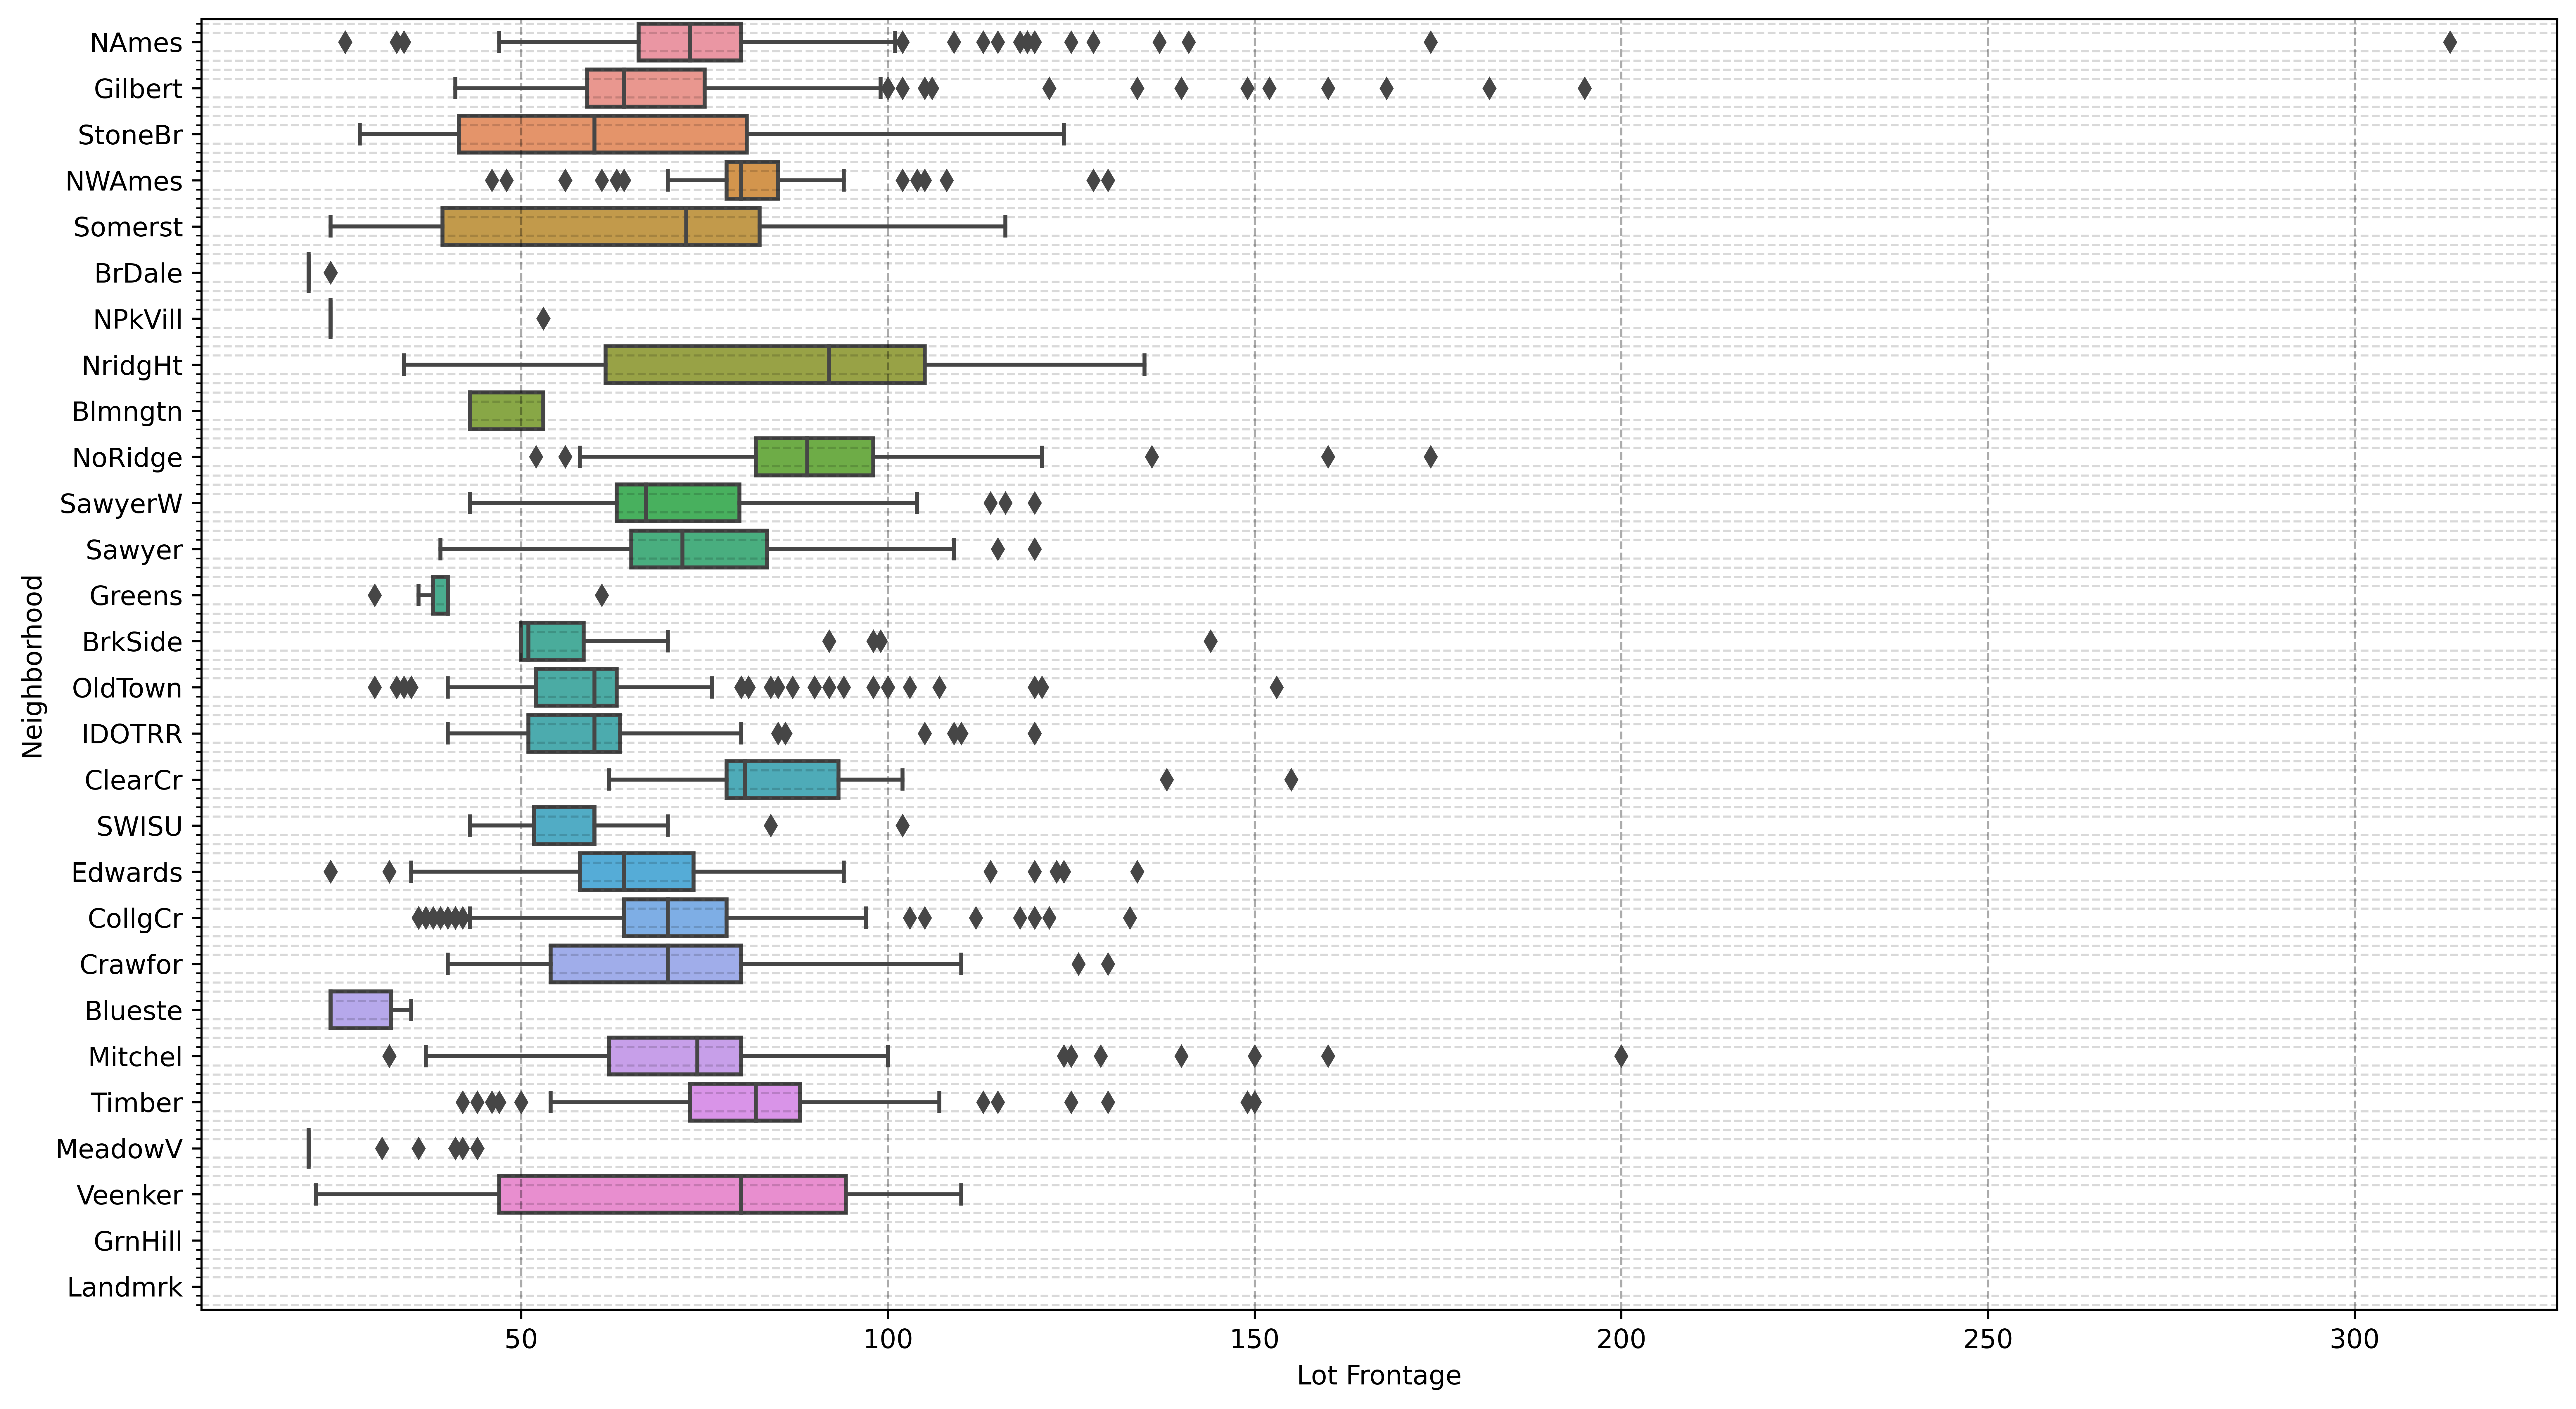

In [163]:
Std_Vis_Plot()
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

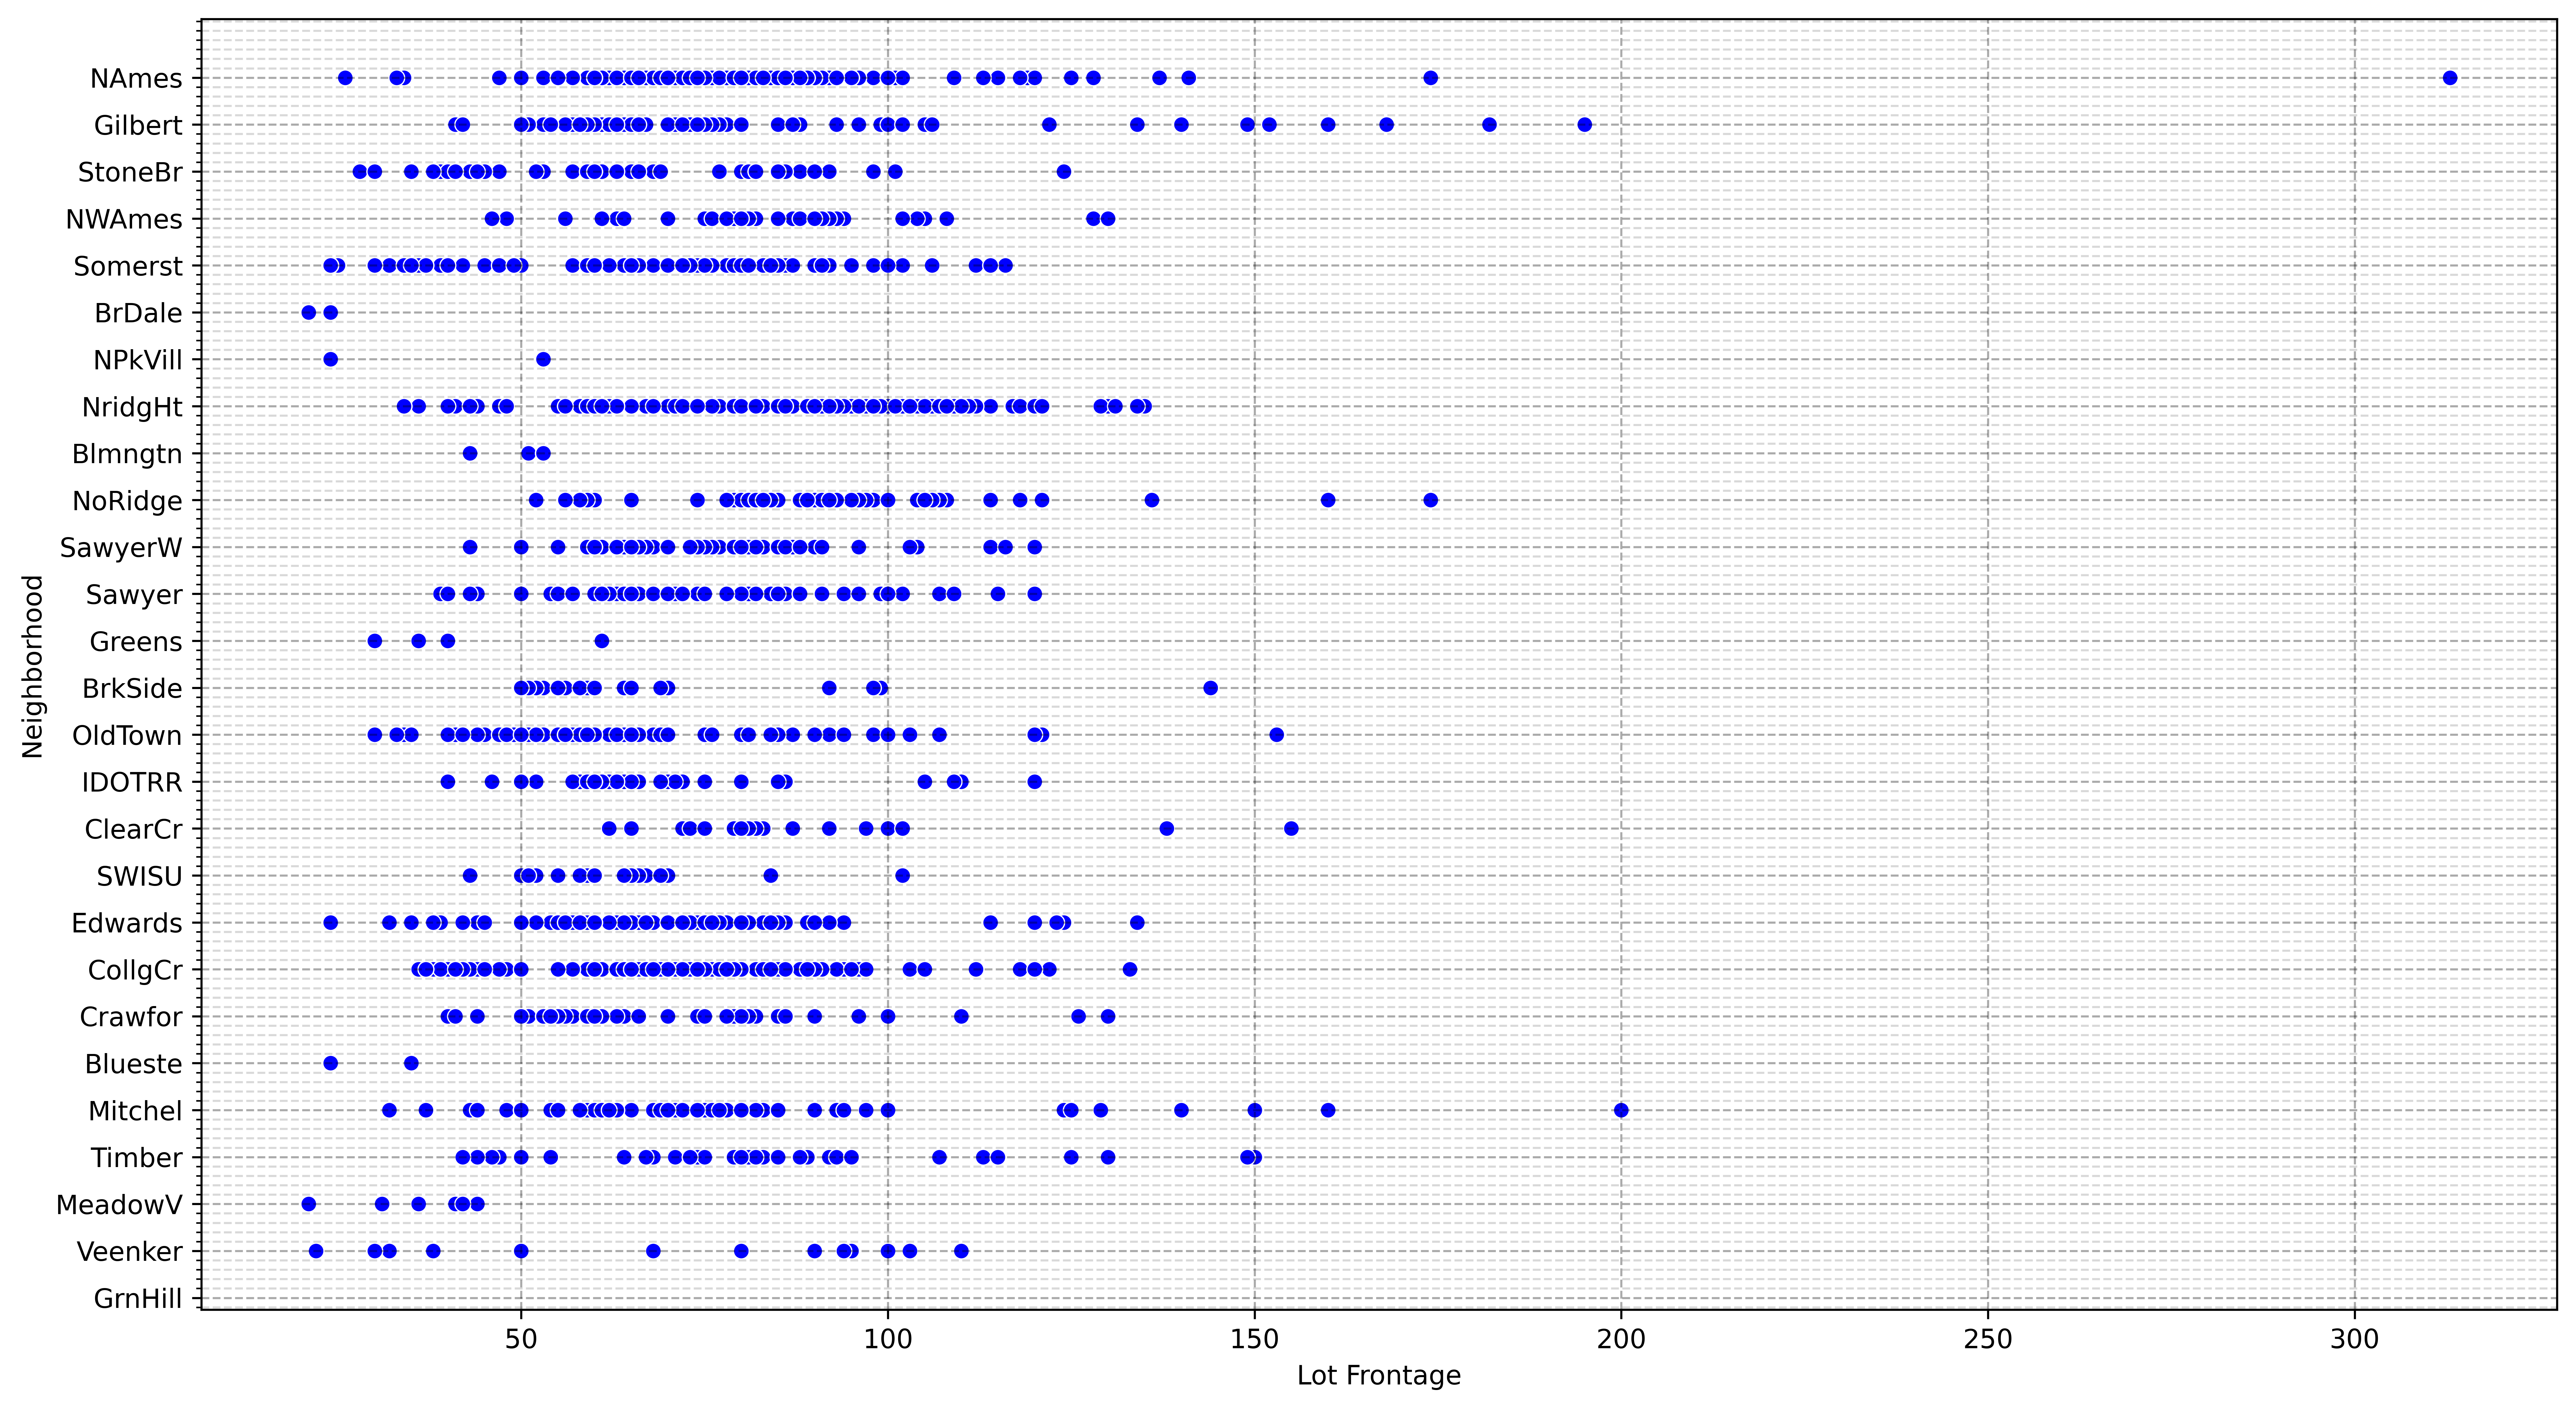

In [168]:
Std_Vis_Plot()
sns.scatterplot(y='Neighborhood',x='Lot Frontage',data=df,color='blue')

## Impute Missing Data based on other Features

There are more complex methods, but usually the simpler the better, it avoids building models on top of other models.

More Info on Options: https://scikit-learn.org/stable/modules/impute.html

In [ ]:
df.groupby('Neighborhood')['Lot Frontage']

In [210]:
lot_front_min=df.groupby('Neighborhood')['Lot Frontage'].mean()-(norm.ppf(0.95)*df.groupby('Neighborhood')['Lot Frontage'].std()/(np.sqrt(df.groupby('Neighborhood')['Lot Frontage'].count())))

In [226]:
lot_front_min=lot_front_min.fillna(0)

In [225]:
lot_front_max=df.groupby('Neighborhood')['Lot Frontage'].mean()+(norm.ppf(0.95)*df.groupby('Neighborhood')['Lot Frontage'].std()/(np.sqrt(df.groupby('Neighborhood')['Lot Frontage'].count())))
lot_front_max=lot_front_max.fillna(0)

In [237]:
df[df['Lot Frontage'].isnull()]['Neighborhood']

11      Gilbert
14      StoneBr
22      Somerst
23        NAmes
24        NAmes
         ...   
2891     Timber
2894     Timber
2895     Timber
2909    Mitchel
2923    Mitchel
Name: Neighborhood, Length: 490, dtype: object

In [227]:
lot_front_min['GrnHill'],lot_front_max['GrnHill']

(0.0, 0.0)

In [244]:

for item in df[df['Lot Frontage'].isnull()]['Neighborhood']:
    #Min values
    lot_front_min=df.groupby('Neighborhood')['Lot Frontage'].mean()-(norm.ppf(0.95)*df.groupby('Neighborhood')['Lot Frontage'].std()/(np.sqrt(df.groupby('Neighborhood')['Lot Frontage'].count())))
    lot_front_min=lot_front_min.fillna(0)
    #Max values
    lot_front_max=df.groupby('Neighborhood')['Lot Frontage'].mean()+(norm.ppf(0.95)*df.groupby('Neighborhood')['Lot Frontage'].std()/(np.sqrt(df.groupby('Neighborhood')['Lot Frontage'].count())))
    lot_front_max=lot_front_max.fillna(0)
    
    df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(np.random.uniform(low=lot_front_min[item],high=lot_front_max[item],size=None)))


## Transform Column

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html

In [245]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [246]:
df[df['Lot Frontage'].isnull()]

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

[0 rows x 80 columns]

In [247]:
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL         141.0     31770   Pave    NA       IR1   
1           20        RH          80.0     11622   Pave    NA       Reg   
2           20        RL          81.0     14267   Pave    NA       IR1   
3           20        RL          93.0     11160   Pave    NA       Reg   
4           60        RL          74.0     13830   Pave    NA       IR1   

  Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
0          Lvl    AllPub     Corner  ...         0      NA     NA   
1          Lvl    AllPub     Inside  ...         0      NA  MnPrv   
2          Lvl    AllPub     Corner  ...         0      NA     NA   
3          Lvl    AllPub     Corner  ...         0      NA     NA   
4          Lvl    AllPub     Inside  ...         0      NA  MnPrv   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  SalePrice  
0           NA        0       5     2010        WD           Normal     215000  
1           NA        0       6     2010        WD           Normal     105000  
2         Gar2    12500       6     2010        WD           Normal     172000  
3           NA        0       4     2010        WD           Normal     244000  
4           NA        0       3     2010        WD           Normal     189900  

[5 rows x 80 columns]

In [248]:
percent_nan = percent_missing(df)

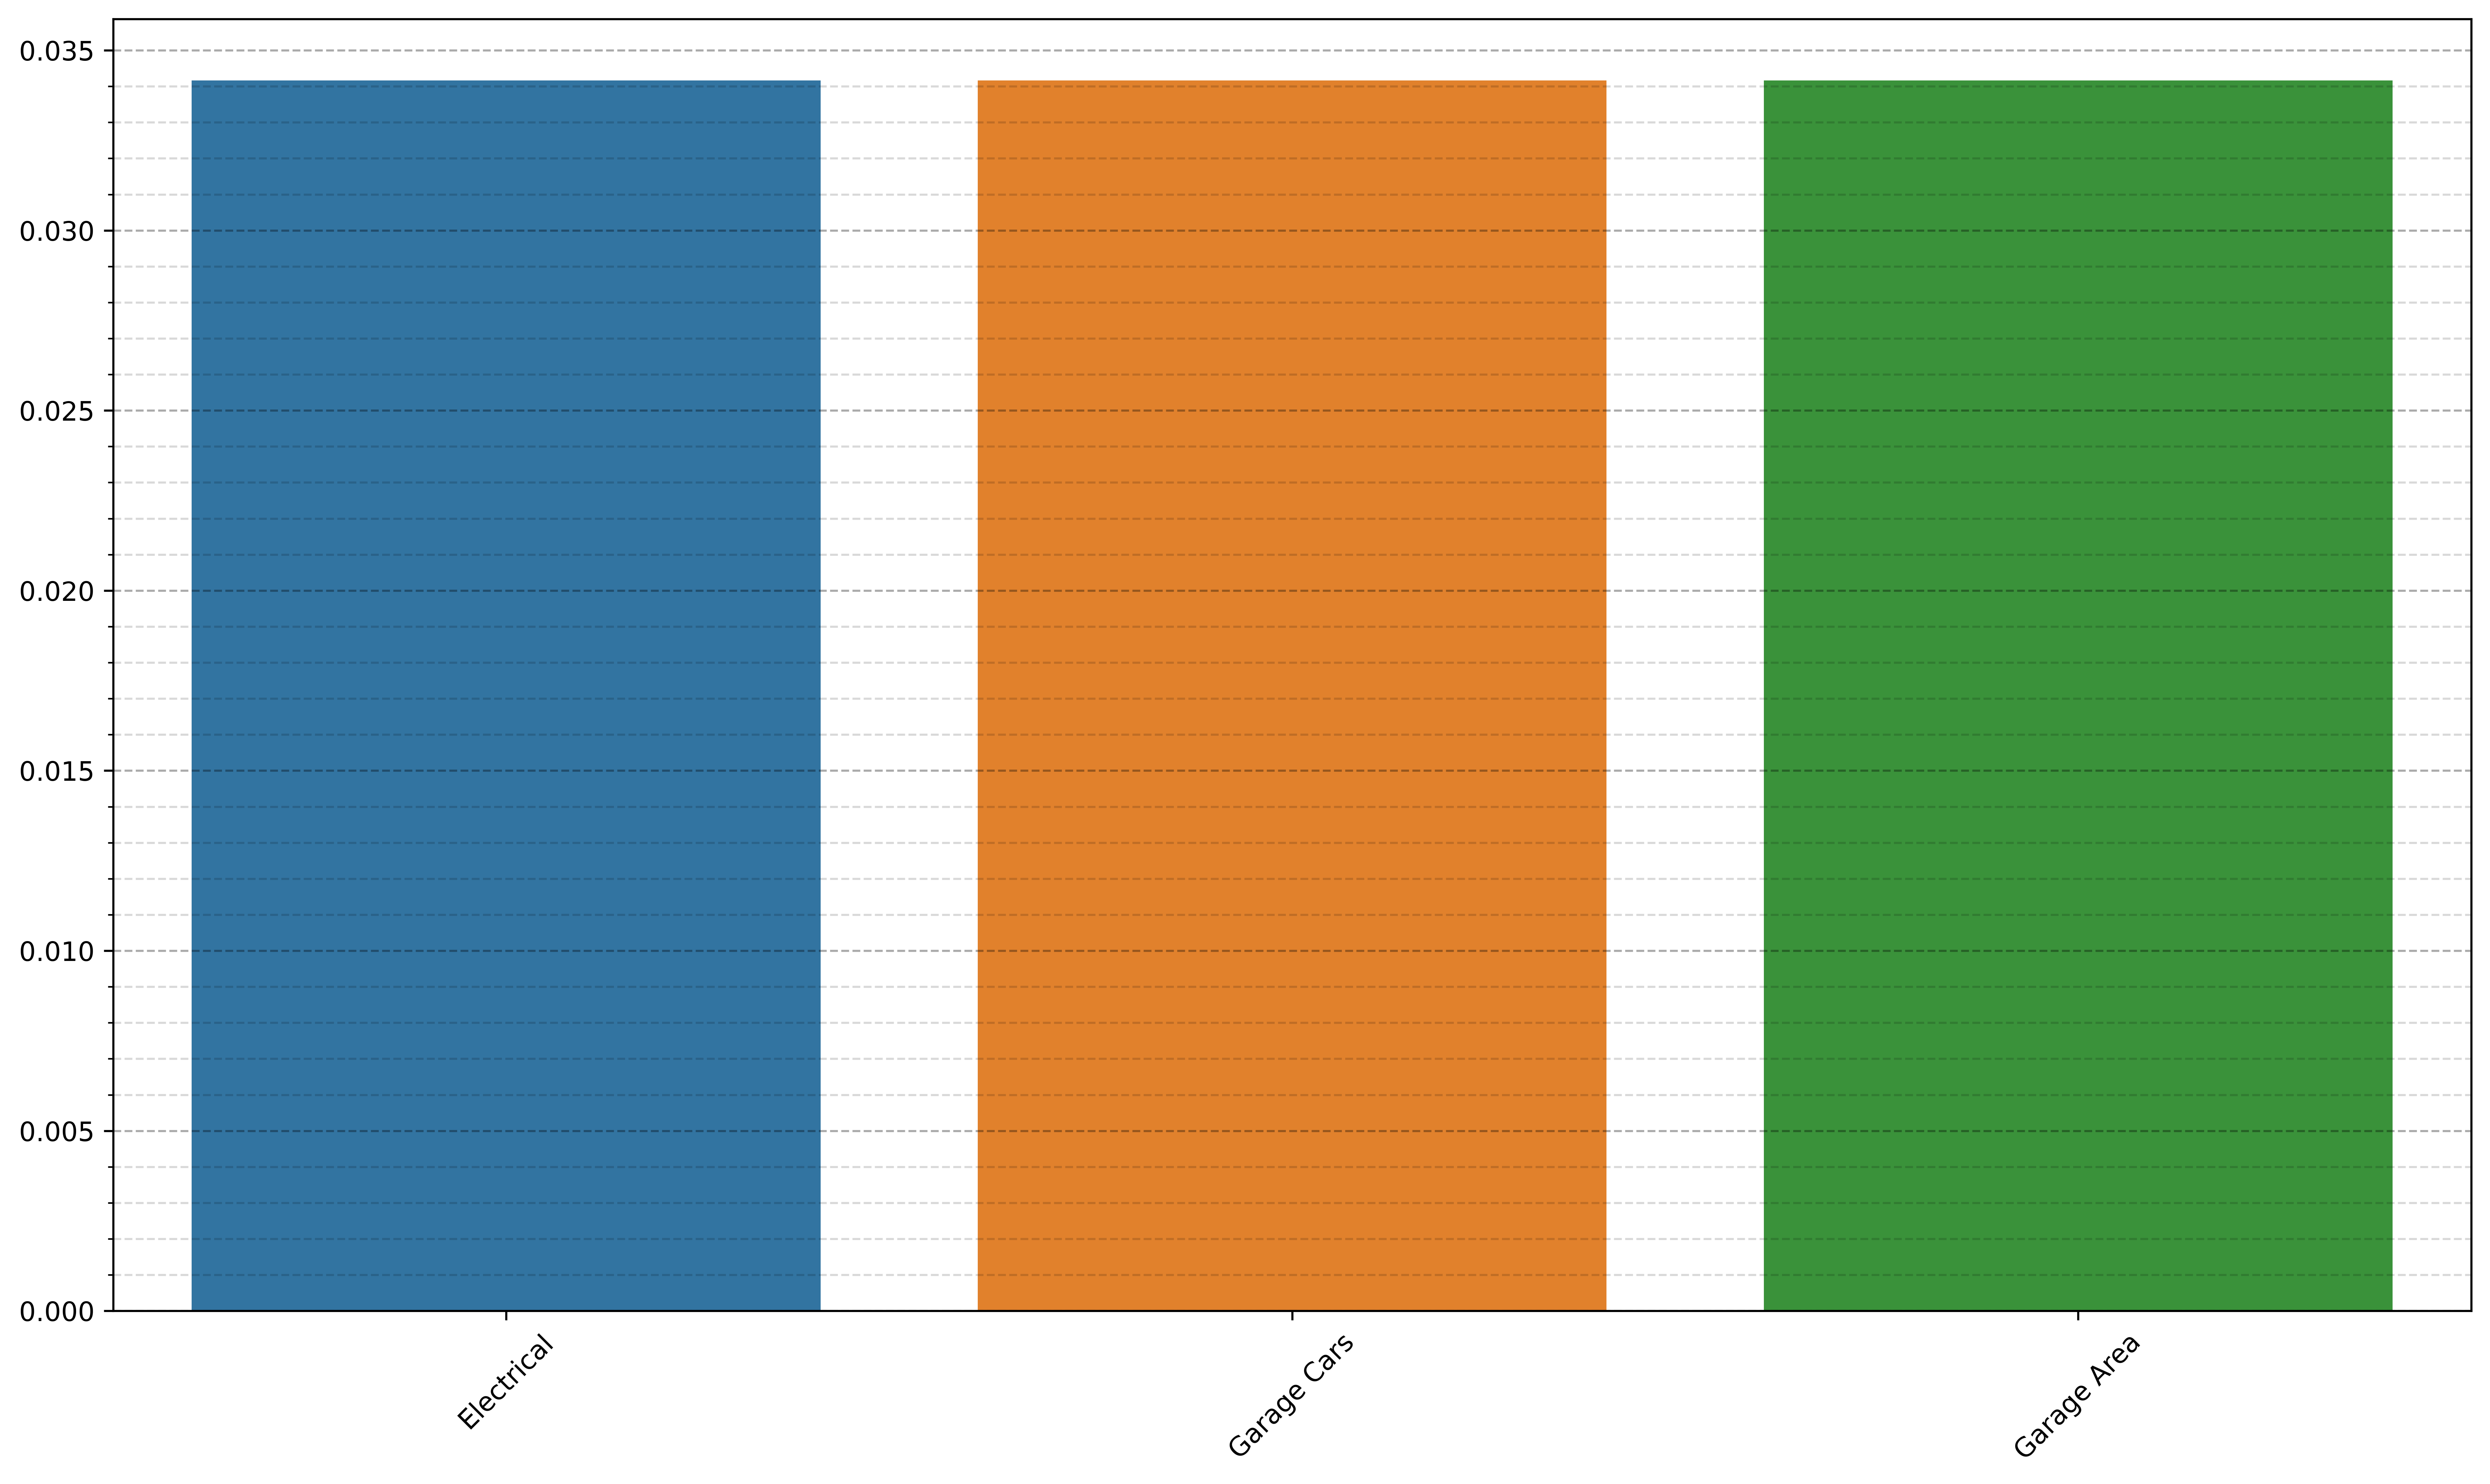

In [254]:
Std_Vis_Plot()
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=45);

In [250]:
percent_nan = percent_missing(df)

In [251]:
percent_nan

Electrical     0.034165
Garage Cars    0.034165
Garage Area    0.034165
dtype: float64

Great! We no longer have any missing data in our entire data set! Keep in mind, we should eventually turn all these transformations into an easy to use function. For now, lets' save this dataset:

In [ ]:
df.to_csv("../DATA/AMES_FIXED_EX.csv",index=False)

----